## Task 1

## Prediction using Supervised ML

  * Predict the percentage of an student based on the no. of study hours.
  * This is a simple linear regression task as it involves just 2 variables.

## Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Importing Data

In [85]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [86]:
#Checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [87]:
#checking detailed information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [88]:
#checking summary statistic
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## EDA

### 1. Univariant analysis

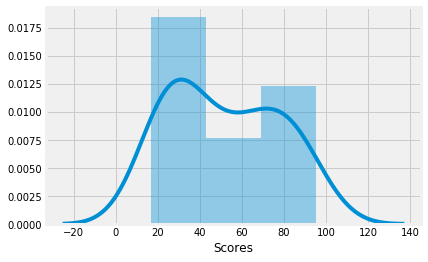

In [89]:
sns.distplot(df['Scores'])
plt.show()

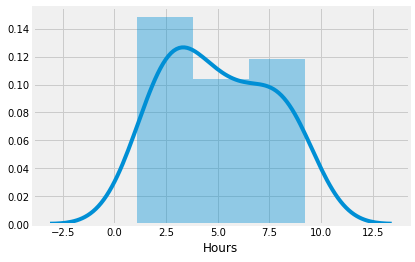

In [90]:
sns.distplot(df['Hours'])
plt.show()

Both plots shows both the data are slightly right skewed

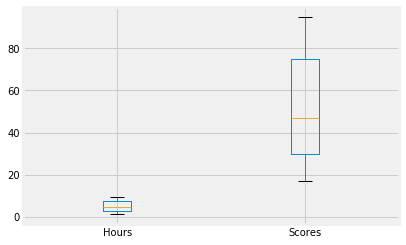

In [91]:
df.plot.box()
plt.show()

### 2. Bivariant analysis

## Checking relation between variable

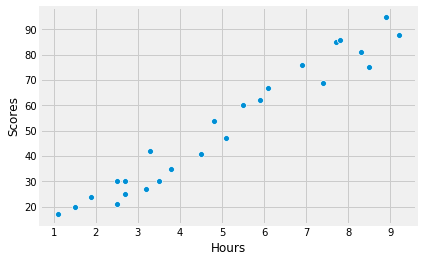

In [92]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.show()

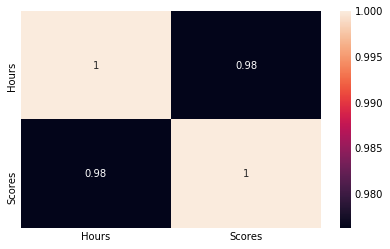

In [93]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Both variable have very high correlation

## Preparing data for modeling

In [94]:
X = df[['Hours']]
y = df[['Scores']]

## Spliting data into train and test set

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [96]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((20, 1), (20, 1), (5, 1), (5, 1))

## Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
print('Coefficents',lr.coef_)
print('Intercept', lr.intercept_)

Coefficents [[9.68207815]]
Intercept [2.82689235]


## Plotting Best-Fit-Line

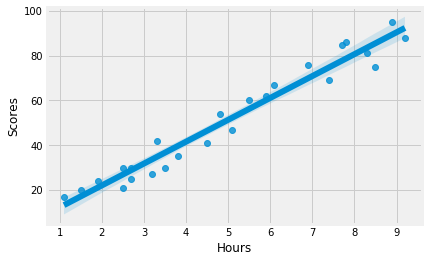

In [99]:
sns.regplot(x= 'Hours',y='Scores',data= df)
plt.show()

In [100]:
y_pred = lr.predict(X_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [101]:
df2 = pd.DataFrame({'Actul':y_test.values.flatten(),'Predicted':y_pred.flatten()})
df2

,Actul,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Model Evulation

In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('RMSE Value: {}'.format(mean_squared_error(y_test,y_pred,squared = False)))
print('MSE Value: {}'.format(mean_squared_error(y_test,y_pred)))
print('R2- Score: {}'.format(r2_score(y_test,y_pred)))

RMSE Value: 4.352380006653288
MSE Value: 18.943211722315272
R2- Score: 0.9678055545167994


#### 96% variation in score is explained by hours 

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [103]:
new = np.array(9.25).reshape(1,-1)
result = lr.predict(new)
print('predicted % score if a student studies for 9.25 hrs/ day = {}%'.format(round(np.asscalar(result)),2))

predicted % score if a student studies for 9.25 hrs/ day = 92%
